Selected Columns (First 10 Rows):
       DISTNAME  OVERALL_LI
0       KUPWARA       66.92
1      BARAMULA       66.93
2      SRINAGAR       71.21
3        BADGAM       57.98
4       PULWAMA       65.00
5      ANANTNAG       64.32
6  LEH (LADAKH)       80.48
7        KARGIL       74.49
8          DODA       65.97
9      UDHAMPUR       69.90


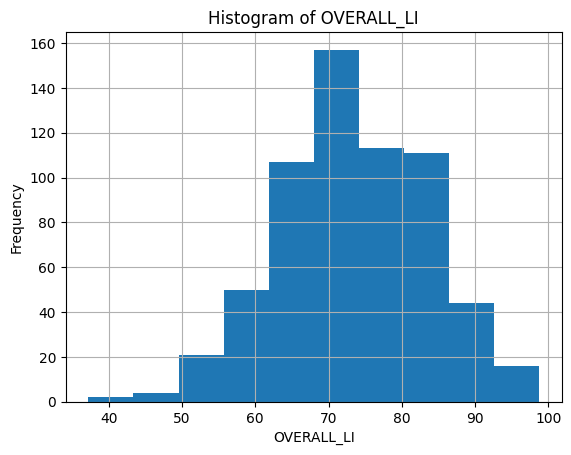


Mean of OVERALL_LI: 73.320224
Standard Deviation of OVERALL_LI: 10.120713572618008

Percentage of data within 1 standard deviations from the mean: 66.56%

Percentage of data within 2 standard deviations from the mean: 95.36%

Percentage of data within 3 standard deviations from the mean: 99.68%

DataFrame with Z-Scores:
        DISTNAME  OVERALL_LI   Z_SCORE
0        KUPWARA       66.92 -0.632895
1       BARAMULA       66.93 -0.631906
2       SRINAGAR       71.21 -0.208672
3         BADGAM       57.98 -1.516940
4        PULWAMA       65.00 -0.822757
..           ...         ...       ...
675  RANGA REDDY       78.05  0.467711
676  MAHBUBNAGAR       56.06 -1.706801
677     NALGONDA       65.05 -0.817813
678     WARANGAL       66.16 -0.708049
679      KHAMMAM       65.46 -0.777269

[625 rows x 3 columns]

Rows with Z-Scores beyond 3 standard deviations (potential outliers):
      DISTNAME  OVERALL_LI   Z_SCORE
434  DANTEWADA       42.67 -3.030890
494  ALIRAJPUR       37.22 -3.569821


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Read CSV file into DataFrame and drop missing values
education_districtwise = pd.read_csv('F:\Districtwise.csv')
education_districtwise = education_districtwise.dropna()

# Step 2: Select specific columns ('DISTNAME', 'OVERALL_LI') and print the first 10 rows
education_districtwise = education_districtwise[["DISTNAME", "OVERALL_LI"]]
print("Selected Columns (First 10 Rows):")
print(education_districtwise.head(10))

# Step 3: Plot a histogram of the 'OVERALL_LI' column
education_districtwise['OVERALL_LI'].hist()
plt.title('Histogram of OVERALL_LI')
plt.xlabel('OVERALL_LI')
plt.ylabel('Frequency')
plt.show()

# Step 4: Calculate mean and standard deviation of 'OVERALL_LI' column
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
std_overall_li = education_districtwise['OVERALL_LI'].std()
print("\nMean of OVERALL_LI:", mean_overall_li)
print("Standard Deviation of OVERALL_LI:", std_overall_li)

# Step 5: Calculate the percentage of data within 1, 2, and 3 standard deviations from the mean
for i in range(1, 4):
    lower_limit = mean_overall_li - i * std_overall_li
    upper_limit = mean_overall_li + i * std_overall_li
    percentage_within_limit = ((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()
    print(f"\nPercentage of data within {i} standard deviations from the mean: {percentage_within_limit:.2%}")

# Step 6: Calculate Z-scores and add a 'Z_SCORE' column to the DataFrame
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
print("\nDataFrame with Z-Scores:")
print(education_districtwise)

# Step 7: Identify and print rows with Z-scores greater than 3 or less than -3 (potential outliers)
outliers = education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]
print("\nRows with Z-Scores beyond 3 standard deviations (potential outliers):")
print(outliers)
